In [139]:
# Badanie skutecznosci systemu

In [140]:
import pandas as pd

In [141]:

# Wczytanie danych
df_base = pd.read_csv("dataset_recommendation_v1.csv")

In [142]:
print(df_base)

            Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
0     1990-01-02    353.40     359.69     351.98      359.69  9.003889e+07   
1     1990-01-03    359.69     360.59     357.89      358.76  1.068500e+08   
2     1990-01-04    358.76     358.76     352.89      355.67  9.833333e+07   
3     1990-01-05    355.67     355.67     351.35      352.20  8.807222e+07   
4     1990-01-08    352.20     354.24     350.54      353.79  7.783889e+07   
...          ...       ...        ...        ...         ...           ...   
8740  2024-12-24   5984.63    6040.10    5981.44     6040.04  1.133217e+09   
8741  2024-12-26   6024.97    6049.75    6007.37     6037.59  1.506251e+09   
8742  2024-12-27   6006.17    6006.17    5932.95     5970.84  1.817798e+09   
8743  2024-12-30   5920.67    5940.79    5869.16     5906.94  1.943393e+09   
8744  2024-12-31   5919.74    5929.74    5868.86     5881.63  1.796607e+09   

            Date  1 Mo  2 Mo  3 Mo  ...  Label       EMA_14    

In [143]:
# Przekształcenie kolumny 'Date' na format datetime
df_base['Date'] = pd.to_datetime(df_base['Date'])

# Filtracja danych od xxxx do xxxx roku
df_main = df_base[(df_base['Date'] >= '1990-01-01') & (df_base['Date'] <= '2020-12-31')].copy()

In [144]:
print(df_main)

            Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
0     1990-01-02    353.40     359.69     351.98      359.69  9.003889e+07   
1     1990-01-03    359.69     360.59     357.89      358.76  1.068500e+08   
2     1990-01-04    358.76     358.76     352.89      355.67  9.833333e+07   
3     1990-01-05    355.67     355.67     351.35      352.20  8.807222e+07   
4     1990-01-08    352.20     354.24     350.54      353.79  7.783889e+07   
...          ...       ...        ...        ...         ...           ...   
7742  2020-12-24   3694.03    3703.82    3689.32     3703.06  8.187849e+08   
7743  2020-12-28   3723.03    3740.51    3723.03     3735.36  1.662610e+09   
7744  2020-12-29   3750.01    3756.12    3723.31     3727.04  1.638287e+09   
7745  2020-12-30   3736.19    3744.63    3730.21     3732.04  1.559328e+09   
7746  2020-12-31   3733.27    3760.20    3726.88     3756.07  1.658919e+09   

           Date  1 Mo  2 Mo  3 Mo  ...  Label       EMA_14     

In [145]:
# Założenia początkowe
initial_budget = 5000  # Początkowy kapitał inwestycyjny w USD
cash = initial_budget  # Początkowa wartość gotówki
holding = 0  # Początkowa liczba akcji (0, bo nie posiadamy żadnych akcji na początku)

# Lista do przechowywania stanu portfela po każdej transakcji
portfolio_values = []

_lastRecommendation = 'Sprzedaj'
# Iterowanie przez dane
for i in range(1, len(df_main )):
    # Pobieranie wartości z bieżącego wiersza
    recommendation = df_main['Rekomendacja'].iloc[i]
    close_price = df_main['Zamkniecie'].iloc[i]

    # Kupno (jeśli rekomendacja to 'Kup')
    if recommendation == 'Kup' and _lastRecommendation == 'Sprzedaj'  and cash >= close_price:
        # Obliczamy ile akcji można kupić za dostępną gotówkę
        num_shares = cash // close_price
        holding += num_shares
        cash -= num_shares * close_price  # Redukujemy gotówkę po zakupie
        _lastRecommendation = 'Kup'

    # Sprzedaż (jeśli rekomendacja to 'Sprzedaj')
    elif recommendation == 'Sprzedaj' and holding > 0:
        # Sprzedajemy wszystkie posiadane akcje
        cash += holding * close_price
        holding = 0  # Po sprzedaży nie posiadamy żadnych akcji
        _lastRecommendation = 'Sprzedaj'

    # Wartość portfela po każdej operacji
    portfolio_value = cash + holding * close_price

    # Dodajemy stan portfela do listy
    portfolio_values.append(portfolio_value)

# Dodajemy listę stanów portfela jako nową kolumnę w df
df_main['Portfolio Value'] = [initial_budget] + portfolio_values


In [146]:
# Wyświetlenie wyników
print(f"Wartość portfela na koniec analizy: {df_main ['Portfolio Value'].iloc[-1]:.2f} USD")

Wartość portfela na koniec analizy: 24720.08 USD


In [147]:
# Opcjonalnie, wyświetlenie pierwszych kilku wierszy z nową kolumną
print(df_main [['Date', 'Rekomendacja', 'Zamkniecie', 'Portfolio Value']])

           Date  Rekomendacja  Zamkniecie  Portfolio Value
0    1990-01-02      Sprzedaj      359.69          5000.00
1    1990-01-03      Sprzedaj      358.76          5000.00
2    1990-01-04      Sprzedaj      355.67          5000.00
3    1990-01-05      Sprzedaj      352.20          5000.00
4    1990-01-08  Brak decyzji      353.79          5000.00
...         ...           ...         ...              ...
7742 2020-12-24           Kup     3703.06         24432.02
7743 2020-12-28  Brak decyzji     3735.36         24625.82
7744 2020-12-29      Sprzedaj     3727.04         24575.90
7745 2020-12-30           Kup     3732.04         24575.90
7746 2020-12-31  Brak decyzji     3756.07         24720.08

[7747 rows x 4 columns]


In [148]:
# Saving dataset with recommendation
df_main .to_csv('dataset_recommendation_results_v1.csv', index=False)

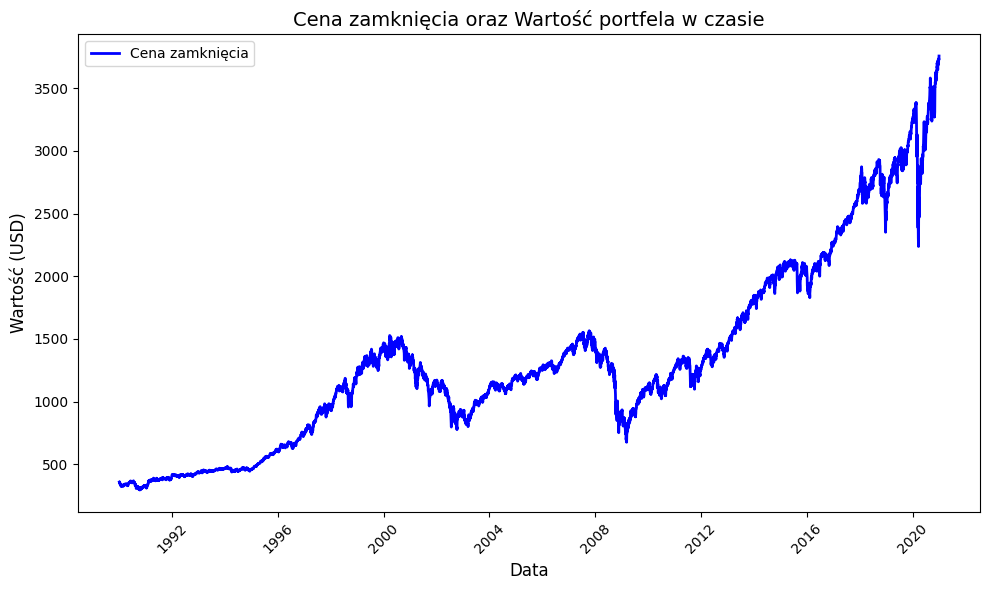

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Wykres cen zamknięcia oraz wartości portfela
plt.figure(figsize=(10, 6))

# Rysowanie wykresu dla 'Zamkniecie'
plt.plot(df_main['Date'], df_main['Zamkniecie'], label='Cena zamknięcia', color='blue', linewidth=2)

# Dodanie tytułów i etykiet
plt.title('Cena zamknięcia oraz Wartość portfela w czasie', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość (USD)', fontsize=12)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.xticks(rotation=45)  # Obrócenie dat na osi X, aby były czytelniejsze
plt.tight_layout()  # Dopasowanie wykresu do przestrzeni

plt.show()

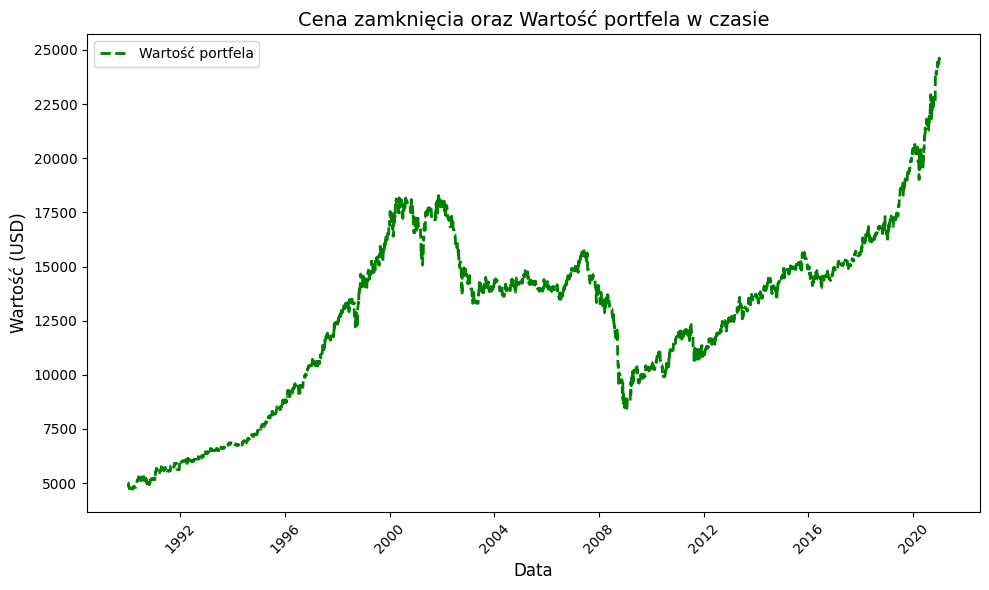

In [150]:
# Wykres cen zamknięcia oraz wartości portfela
plt.figure(figsize=(10, 6))

# Rysowanie wykresu dla 'Portfolio Value'
plt.plot(df_main['Date'], df_main['Portfolio Value'], label='Wartość portfela', color='green', linestyle='--', linewidth=2)

# Dodanie tytułów i etykiet
plt.title('Cena zamknięcia oraz Wartość portfela w czasie', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość (USD)', fontsize=12)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.xticks(rotation=45)  # Obrócenie dat na osi X, aby były czytelniejsze
plt.tight_layout()  # Dopasowanie wykresu do przestrzeni

plt.show()

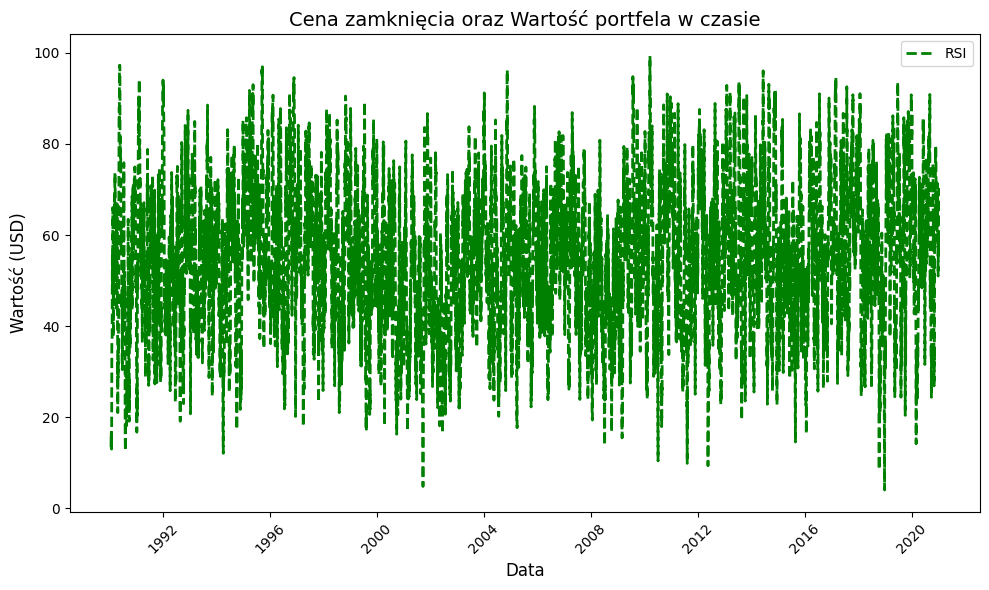

In [151]:
# Wykres cen zamknięcia oraz wartości portfela
plt.figure(figsize=(10, 6))

# Rysowanie wykresu dla 'Portfolio Value'
plt.plot(df_main['Date'], df_main['RSI'], label='RSI', color='green', linestyle='--', linewidth=2)

# Dodanie tytułów i etykiet
plt.title('Cena zamknięcia oraz Wartość portfela w czasie', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość (USD)', fontsize=12)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.xticks(rotation=45)  # Obrócenie dat na osi X, aby były czytelniejsze
plt.tight_layout()  # Dopasowanie wykresu do przestrzeni

plt.show()

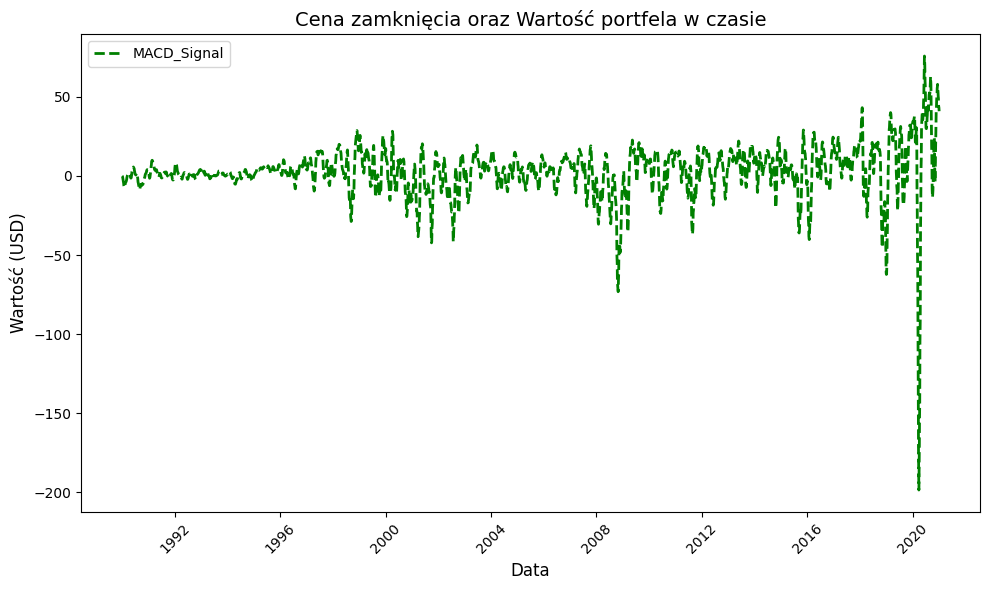

In [152]:
# Wykres cen zamknięcia oraz wartości portfela
plt.figure(figsize=(10, 6))

# Rysowanie wykresu dla 'Portfolio Value'
plt.plot(df_main['Date'], df_main['MACD_Signal'], label='MACD_Signal', color='green', linestyle='--', linewidth=2)

# Dodanie tytułów i etykiet
plt.title('Cena zamknięcia oraz Wartość portfela w czasie', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość (USD)', fontsize=12)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.xticks(rotation=45)  # Obrócenie dat na osi X, aby były czytelniejsze
plt.tight_layout()  # Dopasowanie wykresu do przestrzeni

plt.show()